In [1]:
# plot_flocs.ipynb
from pylab import *
import flopy as fp
import netCDF4
import sys

% matplotlib inline
# identify computer and set path names
import os
import platform
computer_name = platform.uname()[1]
print computer_name
if computer_name=='igsagiegwscshl0':
    print 'CRS Ubuntu laptop'
    src_dir = r"/home/csherwood-pr/crs/src/"
    proj_dir = r"/home/csherwood-pr/crs/proj/"
    case_dir = r'os_flocruns/aug_runs/'
elif computer_name=='igsagiegltcsh72':
    print 'CRS laptop'
    src_dir = r"C:/crs/src/"
    proj_dir = r"C:/crs/proj/"
    case_dir = r'flocs/floc_proc/'
elif computer_name=='IGSAGIEGWSCSH70':
    print 'CRS desktop'
    src_dir = r"D:/crs/src/"
    proj_dir = r"D:/crs/proj/"
    case_dir = r'flocs/floc_proc/'
else :
    print "unknown computer"

########################
# run name 
# maybe plotresults from several runs
flist = ['r056q']
run_name = flist[0]
########################

# import local ROMS and CRS packages
sys.path.append(src_dir+r'octant/octant')
sys.path.append(src_dir+r'py')
sys.path.append(src_dir+r'crspy')


# open netCDF file
url='http://geoport.whoi.edu/thredds/dodsC/sand/usgs/users/aretxabaleta/floc/ocean_his_';
url=url+run_name+'.nc'
print "Opening ",url
nc = netCDF4.Dataset(url)

# open a summary stats file
stats_filename = proj_dir+case_dir+run_name+'_summary.txt'
print "Stats filename: ",stats_filename
s="{0:s}\n".format(stats_filename)
s=s+"{0:s}\n".format("URL: "+url)
with open( stats_filename, "w") as afile:
    afile.write(s)
    
# read vertical grid parameters
Vtransform = nc.variables['Vtransform'][:]
Vstretching = nc.variables['Vstretching'][:]
print 'Vtransform: ',Vtransform,' Vstretching: ',Vstretching
s_rho = nc.variables['s_rho'][:]
s_w = nc.variables['s_w'][:]
Cs_r = nc.variables['Cs_r'][:]
Cs_w = nc.variables['Cs_w'][:]
N = len(s_rho)
Np = len(s_w)
s= 'N  = len(s_rho): {0}, Np = len(s_w) : {1}\n'.format(len(s_rho),len(s_w))

# print nc.variables['s_rho'] # get all the netCDF info
theta_s = nc.variables['theta_s'][:]
theta_b = nc.variables['theta_b'][:]
hc = nc.variables['hc'][:]

s = s+'hc = {0}, theta_s = {1}, theta_b = {2}\n'.format(hc,theta_s,theta_b)
print s
with open( stats_filename, "a") as afile:
    afile.write(s)
# here is the formula for calculating the depth parameter
#a=theta_s
#b=theta_b
#sr = s_rho
#C = (1-b)*np.sinh(a*sr)/np.sinh(a) + b*[np.tanh(a*(sr+0.5))/(2*np.tanh(0.5*a)) - 0.5]

IGSAGIEGWSCSH70
CRS desktop
Opening  http://geoport.whoi.edu/thredds/dodsC/sand/usgs/users/aretxabaleta/floc/ocean_his_r056q.nc
Stats filename:  D:/crs/proj/flocs/floc_proc/r056q_summary.txt
Vtransform:  1  Vstretching:  1
N  = len(s_rho): 50, Np = len(s_w) : 51
hc = 0.0, theta_s = 1.0, theta_b = 0.8



Intial zeta: 0.0, max. deviation: 8.38438915826e-14



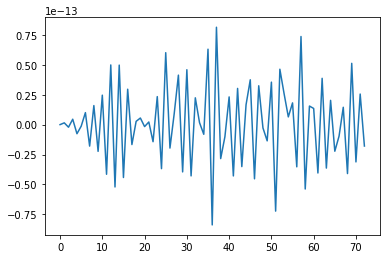

In [2]:
# read water depth
h = nc.variables['h'][3,4]
#hc = nc.variables['hc'][:]
zeta = nc.variables['zeta'][:,3,4]
s='Intial zeta: {0}, max. deviation: {1}\n'.format(zeta[0],max(abs(zeta-zeta[0])))
print s
with open( stats_filename, "a") as afile:
    afile.write(s)
plot(zeta)

In [3]:
# use Rob Hetland's depths.py functions
zw = fp.get_zw(Vtransform=Vtransform, Vstretching=Vstretching, N=N+1, \
    theta_s=theta_s, theta_b=theta_b, h=h, hc=hc, zeta=0, Hscale=3)
z = fp.get_zrho(Vtransform=Vtransform, Vstretching=Vstretching, N=N, \
    theta_s=theta_s, theta_b=theta_b, h=h, hc=hc, zeta=0, Hscale=3)

time = nc.variables['ocean_time'][:]
nt = len(time)
nz = len(z)
nzw = len(zw)
dz = diff(zw)
s = "nt, nz, nzw: {0}, {1}, {2}\n".format(nt,nz,nzw)
s = s+"Final time: {0} hrs.\n".format(time[-1]/3600.)
print s
with open( stats_filename, "a") as afile:
    afile.write(s)

dz2d = tile(dz,(nt,1))
print 'shape(dz2d) = ',shape( dz2d )
#print zw
#print dz

nt, nz, nzw: 73, 50, 51
Final time: 12.0 hrs.

shape(dz2d) =  (73L, 50L)


In [4]:
# read sediment classes
fdiam = 1e6*nc.variables['Sd50'][:]
ws = 1e3*nc.variables['Wsed'][:]
rhos = nc.variables['Srho'][:]
print(ws)
print(fdiam)
print(rhos)

[ 0.07085   0.096443  0.131282  0.178706  0.243261  0.331135  0.450752
  0.613579  0.835225  1.136937  1.547638  2.106698  2.86771   3.903626
  5.31375   0.1     ]
[   20.       27.225    37.059    50.446    68.669    93.475   127.241
   173.205   235.773   320.942   436.877   594.692   809.516  1101.941
  1500.      150.   ]
[ 1350.        1263.753867  1200.395104  1153.850028  1119.656746
  1094.537428  1076.084092  1062.527767  1052.568922  1045.252882
  1039.87832   1035.93002   1033.029491  1030.898683  1029.333333  2650.      ]


Shape of fdiam, ws: (16L,), (16L,)Using ncs = 15
Shape(mud) = (73L, 50L, 15L)
Intial mass: 12.0 kg/m2. Change: -0.0281
Max. abs. change in mud inventory: 0.0280616734318

D:/crs/proj/flocs/floc_proc/case_r056qmass_change.png


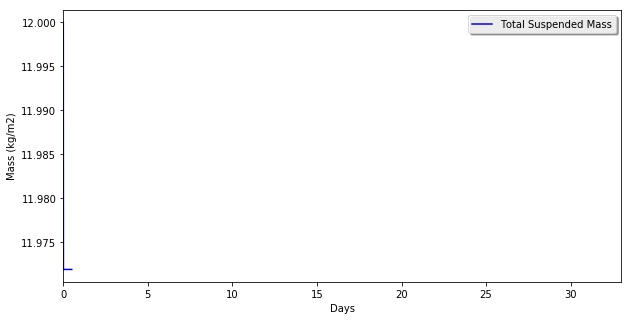

In [5]:
# check mass conservation of suspended NCS classes only
# (last class in these runs is sand)
ncs = 15
s = "Shape of fdiam, ws: {0}, {1}".format(shape(fdiam),shape(ws))
s = s+ "Using ncs = {0}".format(ncs)
print s
with open( stats_filename, "a") as afile:
    afile.write(s)
    
mud = zeros((nt,nz,ncs))
for i in range(0,ncs) :
    v = 'mud[:,:,'+str(i)+'] = '
    m = 'mud_'+ '%(i)02d' % {"i":i+1}  # use formatting to get mud_01
    c =  v+r"nc.variables['" +m+ r"'][:,:,3,4]"
    #print c                          # c is the command that will be executed
    exec(c)
    
s = 'Shape(mud) = {0}'.format(shape(mud))

mmud = sum(mud,2)*dz2d          
initial_mass = sum(mmud[0,:])
final_mass = sum(mmud[nt-1,:])
summud_ts = sum(mmud,axis=1)
max_mud_change = max( abs( summud_ts[:]-summud_ts[0] ))

s=s+"\nIntial mass: {0} kg/m2. Change: {1:7.4f}".format(initial_mass,final_mass-initial_mass)
s=s+'\nMax. abs. change in mud inventory: {0}\n'.format(max_mud_change )
print s
with open( stats_filename, "a") as afile:
    afile.write(s)
    
if( max_mud_change > 1e-8 ):
    # Make a plot if mass is not conserved
    # fig,ax = plt.figure(figsize=(4,10))
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(time/(3600.*24.), sum(mmud,1), 'b', label='Total Suspended Mass')
    #ax.plot(time/(3600.*24.), sum(mmud,1), 'k--', label='Total' )
    legend = ax.legend(loc = 'upper right', shadow=True)
    plt.ylabel('Mass (kg/m2)')
    plt.xlabel('Days')
    plt.xlim([0.,33.])
    fig_name = proj_dir+case_dir+'case_'+run_name+'mass_change.png'
    print fig_name
    plt.savefig(fig_name)

In [6]:
# make a histogram of size classes at max conc (skip first n2skip, because max is at t=0)
n2skip = 5
mmudtot = np.sum(mmud,1)
print np.shape(mmudtot)
print 'Max: ',np.amax(mmudtot[n2skip:-1]),'at ',n2skip+np.argmax(mmudtot[n2skip:-1])
print 'Min: ',np.amin(mmudtot[n2skip:-1]),'at ',n2skip+np.argmin(mmudtot[n2skip:-1])

(73L,)
Max:  11.9719383266 at  42
Min:  11.9719383266 at  5


shape(zw): (51L,)
(shape(tw2d): (73L, 51L)
(shape(zw2d): (73L, 51L)

shape(ws_av)  (73L, 50L)
shape(mconc)  (73L, 50L)
D:/crs/proj/flocs/floc_proc/case_r056qconc_diam_ws.png


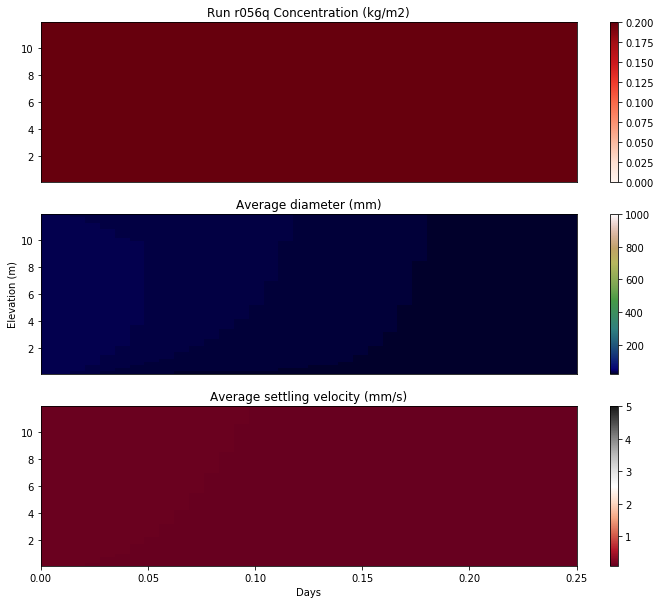

In [7]:
# make 2D arrays of time and depths
t2d = tile(time,(nz,1)).T #2D time(nt, nz)
tw2d = tile(time,(nz+1,1)).T #2D time(nt, nz)
s='shape(zw): {0}\n'.format(shape(zw))
z2d  = tile(h+z.T,(nt,1))
zw2d = tile(h+zw.T,(nt,1))

s=s+'(shape(tw2d): {0}\n'.format(shape(tw2d))
s=s+'(shape(zw2d): {0}\n'.format(shape(zw2d))
print s
with open( stats_filename, "a") as afile:
    afile.write(s)

# calculate size- and settling-velocity weighted floc dists
#print shape(ws)
eps = 1.e-8
ws_av = sum((mud+eps)*ws[0:ncs],2)/sum((mud+eps),2)
fdiam_av = sum((mud+eps)*fdiam[0:ncs],2)/sum((mud+eps),2)

print "shape(ws_av) ",shape(ws_av)
mconc = sum(mud,2);
print "shape(mconc) ",shape(mconc)
cmap = plt.get_cmap('PiYG')
cmap = plt.get_cmap('RdGy')

tax = [0. ,.25]
fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(3,1,1)

cmap = plt.get_cmap('RdGy')
cmap = plt.get_cmap('binary')
cmap = plt.get_cmap('PuRd')
cmap = plt.get_cmap('Reds')
pcolormesh(t2d/(24.*3600.),z2d,sum(mud,2),cmap=cmap,vmin=0.,vmax=0.2)
ax.get_xaxis().set_ticks([])
plt.xlim(tax)
plt.title('Run '+run_name+' Concentration (kg/m2)')
plt.colorbar()

ax=fig.add_subplot(3,1,2)
cmap = plt.get_cmap('Paired')
cmap = plt.get_cmap('RdGy')
cmap = plt.get_cmap('PuOr')
cmap = plt.get_cmap('gist_earth')
pcolormesh(t2d/(24.*3600.),z2d,fdiam_av,cmap=cmap,vmin=20,vmax=1000)
plt.xlim(tax)
plt.ylabel('Elevation (m)')
ax.get_xaxis().set_ticks([])
plt.title('Average diameter (mm)')
plt.colorbar()

ax=fig.add_subplot(3,1,3)
cmap = plt.get_cmap('RdGy')
pcolormesh(t2d/(24.*3600.),z2d,ws_av,cmap=cmap,vmin=0.1,vmax=5)
plt.xlim(tax)
plt.colorbar()
plt.xlabel('Days')
plt.title('Average settling velocity (mm/s)')
fig_name = proj_dir+case_dir+'case_'+run_name+'conc_diam_ws.png'
print fig_name
plt.savefig(fig_name)

In [8]:
# report final values
s= "\n"+"i   z    diam    ws     conc"
s=s +"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f}"\
.format(nz,   z2d[-1,nz-1],  fdiam_av[-1,nz-1], ws_av[-1,nz-1],sum(mud[nt-1,nz-1,:],0 ))
s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f}"\
.format(nz/2, z2d[-1,nz/2], fdiam_av[-1,nz/2], ws_av[-1,nz/2],sum(mud[nt-1,nz/2,:],0 ))
s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f}"\
.format(1,    z2d[-1,1],    fdiam_av[-1,1], ws_av[-1,1],sum(mud[nt-1,1,:],0 ))
s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f}"\
.format(0,    z2d[-1,0],    fdiam_av[-1,0], ws_av[-1,0],sum(mud[nt-1,0,:],0 ))
print s
with open( stats_filename, "a") as afile:
    afile.write(s)


i   z    diam    ws     conc
50 11.9   26.1  0.092 0.9452
25  6.3   26.1  0.092 0.9972
 1  0.3   26.1  0.092 1.0267
 0  0.1   26.1  0.092 1.0352


In [9]:
# Replay the contents of the summary txt file
with open( stats_filename, "r") as afile:
    s=afile.read()
print s

D:/crs/proj/flocs/floc_proc/r056q_summary.txt
URL: http://geoport.whoi.edu/thredds/dodsC/sand/usgs/users/aretxabaleta/floc/ocean_his_r056q.nc
N  = len(s_rho): 50, Np = len(s_w) : 51
hc = 0.0, theta_s = 1.0, theta_b = 0.8
Intial zeta: 0.0, max. deviation: 8.38438915826e-14
nt, nz, nzw: 73, 50, 51
Final time: 12.0 hrs.
Shape of fdiam, ws: (16L,), (16L,)Using ncs = 15Shape(mud) = (73L, 50L, 15L)
Intial mass: 12.0 kg/m2. Change: -0.0281
Max. abs. change in mud inventory: 0.0280616734318
shape(zw): (51L,)
(shape(tw2d): (73L, 51L)
(shape(zw2d): (73L, 51L)

i   z    diam    ws     conc
50 11.9   26.1  0.092 0.9452
25  6.3   26.1  0.092 0.9972
 1  0.3   26.1  0.092 1.0267
 0  0.1   26.1  0.092 1.0352


D:/crs/proj/flocs/floc_proc/case_r056qmax_profiles.png
D:/crs/proj/flocs/floc_proc/case_r056qmin_profiles.png


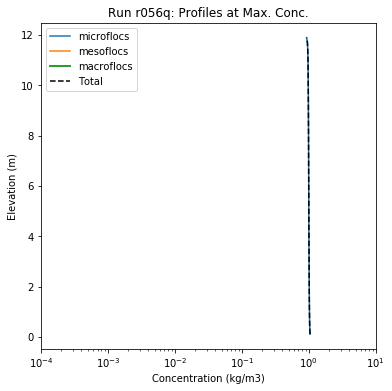

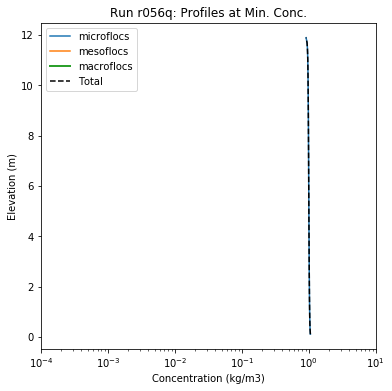

In [10]:
# Profile at min and max

microflocs = np.sum(mud[:,:,0:3],2)
mesoflocs =  np.sum(mud[:,:,4:8],2)
macroflocs =  np.sum(mud[:,:,9:],2)

eps = 1e-6


# plot individual size classes
#for i in range(0,ncs) :
#    lb = '%(s)4d' % {"s":fdiam[i]}
#    #print lb
#    plt.semilogx(mud[673,:,i]+eps,h+z,label=lb)
# microflocs

#TODO - where do these numbers come from?
imaxc = 25
iminc = 20
im = imaxc
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
plt.semilogx(microflocs[im,:]+eps,h+z,label='microflocs')
plt.semilogx(mesoflocs[im,:]+eps,h+z,label='mesoflocs')
plt.semilogx(macroflocs[im,:]+eps,h+z,label='macroflocs',linewidth=2)

plt.semilogx( sum(mud[im,:,:],1),h+z,'k--',label='Total')
plt.legend(loc='upper left')
ax.set_title('Run '+run_name+': Profiles at Max. Conc.')
plt.ylabel('Elevation (m)')
plt.xlabel('Concentration (kg/m3)')
plt.xlim([1.e-4,10.])
fig_name = proj_dir+case_dir+'case_'+run_name+'max_profiles.png'
print fig_name
plt.savefig(fig_name)

# profile for min
im = iminc
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
plt.semilogx(microflocs[im,:]+eps,h+z,label='microflocs')
plt.semilogx(mesoflocs[im,:]+eps,h+z,label='mesoflocs')
plt.semilogx(macroflocs[im,:]+eps,h+z,label='macroflocs',linewidth=2)

plt.semilogx( sum(mud[im,:,:],1),h+z,'k--',label='Total')
plt.legend(loc='upper left')
ax.set_title('Run '+run_name+': Profiles at Min. Conc.')
plt.ylabel('Elevation (m)')
plt.xlabel('Concentration (kg/m3)')
plt.xlim([1.e-4,10.])
fig_name = proj_dir+case_dir+'case_'+run_name+'min_profiles.png'
print fig_name
plt.savefig(fig_name)

Background akv_bak =  1e-05
Background Zob =  0.0005
D:/crs/proj/flocs/floc_proc/case_r056qmixing.png


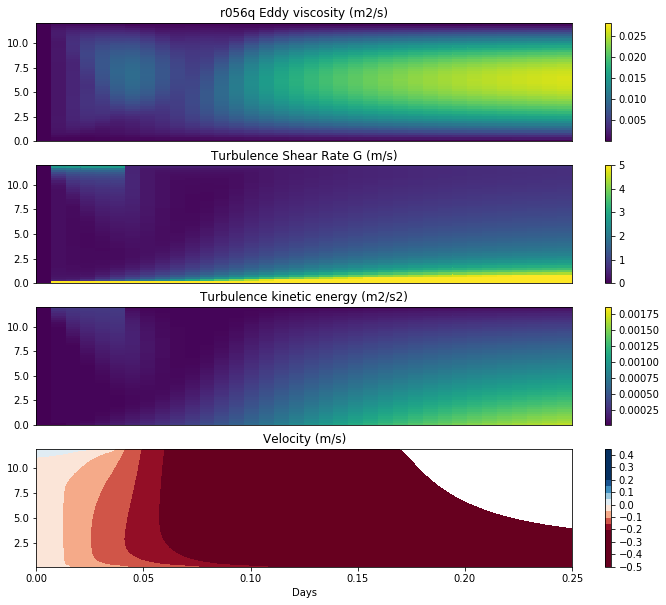

In [11]:
# Calculate and plot turbulence and mixing info
tke = nc.variables['tke'][:,:,3,4]
gls = nc.variables['gls'][:,:,3,4]
akv_bak = nc.variables['Akv_bak'][:]
akt_bak = nc.variables['Akt_bak'][:]
akv = nc.variables['AKv'][:,:,3,4]
nueau =      1.5E-6
gls_p =     -1.000  #gls_p           GLS stability exponent.
gls_m =      0.500  #gls_m           GLS turbulent kinetic energy exponent.
gls_n =     -1.000  #gls_n           GLS turbulent length scale exponent.
gls_cmu0 =   5.4770E-01 #            GLS stability coefficient.
 
exp1 = 3.0+gls_p/gls_n
exp2 = 1.5+gls_m/gls_n
exp3 = -1.0/gls_n
diss = gls_cmu0**exp1*tke**exp2*gls**exp3
Gval=sqrt(diss/nueau)
print 'Background akv_bak = ',akv_bak

#tidx = -1       # just get the final time step, for now.
# read a 3D temperature field at specified time step
#temp = nc.variables['temp'][tidx, :, :, :]
u = nc.variables['u'][:, :, 3, 4]
#v = nc.variables['v'][tidx, :, :, :]

# read a 2D water level (height of ocean surface) at all time steps
#eta = nc.variables['zeta'][:, 3, 4]
# read bottom roughness zoN
zob = nc.variables['Zob'][:]
print 'Background Zob = ',zob
zoa = nc.variables['Zo_app'][:, 3, 4]
if max(zoa) <= 1.e-6 :
    print 'Max zoa = ',max(zoa)
    print 'Replacing with ',zob
    zoa = zob*np.ones_like(zoa)
bustr = nc.variables['bustr'][:, 3, 4]
try:
    bustrcwmax = nc.variables['bustrcwmax'][:, 3, 4]
except :
    print 'bustrcwmax not available, replacing with bustr'
    bustrcwmax = bustr

#bvstr = nc.variables['bvstr'][:, 3, 4]
ubar = nc.variables['ubar'][:, 3, 4]
#vbar = nc.variables['vbar'][:, 3, 4]


fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(4,1,1)
pcolormesh(tw2d/(3600.*24.),zw2d,(akv+akv_bak))
plt.xlim(tax)
ax.get_xaxis().set_ticks([])
plt.title(run_name+' Eddy viscosity (m2/s)')
plt.colorbar()

ax=fig.add_subplot(4,1,2)
#pcolormesh(tw2d/3600.,zw2d,log10(diss+1.e-8))
#plt.colorbar()
#plt.title('log10[ Dissipation rate (m2/s3) ]')
pcolormesh(tw2d/(3600.*24.),zw2d,Gval,vmin=0.,vmax=5.)
plt.xlim(tax)
ax.get_xaxis().set_ticks([])
plt.colorbar()
plt.title('Turbulence Shear Rate G (m/s)')

ax=fig.add_subplot(4,1,3)
pcolormesh(tw2d/(3600.*24.),zw2d,(tke))
plt.xlim(tax)
ax.get_xaxis().set_ticks([])
plt.title('Turbulence kinetic energy (m2/s2)')
plt.colorbar()

ax=fig.add_subplot(4,1,4)
cmap = plt.get_cmap('Reds')
cmap = plt.get_cmap('RdBu')
#pcolormesh(t2d/3600.,z2d,abs(u),cmap=cmap)
#plt.colorbar()
V = arange(-.5,.5,0.05)
plt.contourf(t2d/(3600.*24.),z2d,u,V,cmap=cmap,vmin=-.20,vmax=.20)
plt.xlim(tax)
plt.colorbar()
plt.xlabel('Days')
plt.title('Velocity (m/s)')
fig_name = proj_dir+case_dir+'case_'+run_name+'mixing.png'
print fig_name
plt.savefig(fig_name)

D:/crs/proj/flocs/floc_proc/case_r056qstress.png


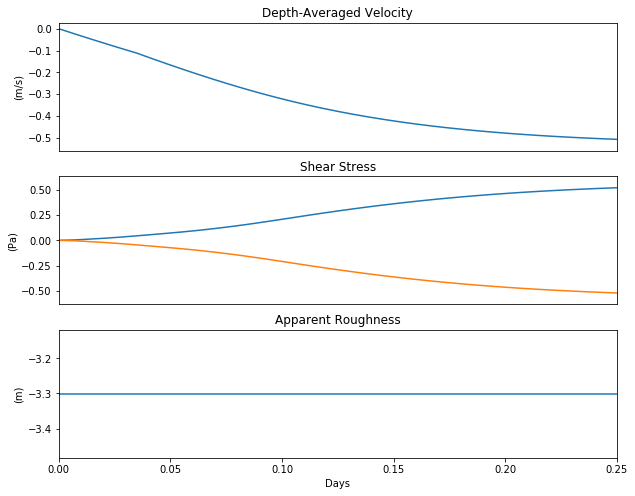

In [12]:
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(3,1,1)
plot(time/(3600.*24.),ubar)
ax.get_xaxis().set_ticks([])
plt.xlim(tax)
plt.title('Depth-Averaged Velocity')
plt.ylabel('(m/s)')

ax=fig.add_subplot(3,1,2)
plot(time/(3600.*24.),bustr)
plot(time/(3600.*24.),bustrcwmax)
ax.get_xaxis().set_ticks([])
plt.xlim(tax)

plt.title('Shear Stress')
plt.ylabel('(Pa)')
ax=fig.add_subplot(3,1,3)
plot(time/(3600.*24.),log10(zoa))
plt.xlim(tax)
plt.title('Apparent Roughness')
plt.ylabel('(m)')
plt.xlabel('Days')

fig_name = proj_dir+case_dir+'case_'+run_name+'stress.png'
print fig_name
plt.savefig(fig_name)

In [13]:
# Calculate G on rho 
Gc = 0.5*(Gval[:,0:50]+Gval[:,1:51])
s = "shape(Gval), shape(Gc): {0}, {1}\n".format(shape(Gval),shape(Gc))

In [14]:
# Calculate and report values at min and max
nts = 10
ilist = np.array([imaxc,iminc])
for im in ilist:
    s="Averaging {0} time steps around {1}.\n".format(nts,im)
    print s
    ws_av_mn = mean(ws_av[im-nts/2:im+nts/2,:],0)
    ws_av_sd = std(ws_av[im-nts/2:im+nts/2,:],0)
    fdiam_av_mn = mean(fdiam_av[im-nts/2:im+nts/2,:],0)
    fdiam_av_sd = std(fdiam_av[im-nts/2:im+nts/2,:],0)
    tconc = sum(mud,2)
    tconc_mn = mean(tconc[im-nts/2:im+nts/2,:],0)
    tconc_sd = std(tconc[im-nts/2:im+nts/2,:],0)
    Gc_mn = mean(Gc[im-nts/2:im+nts/2,:],0)
    Gc_sd = std(Gc[im-nts/2:im+nts/2,:],0)
    #print "shape(ws_av_mn):",shape(ws_av_mn)
    #print "shape(tconc): ",shape(tconc)
    #print "shape(tconc_mn): ",shape(tconc_mn)
    # report final values
    s= "\nMeans for {0} timesteps around {1}.\ni   z    diam    ws     conc   Gc".format(nts,im)
    s=s +"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
    .format(nz,   z2d[-1,nz-1],  fdiam_av_mn[nz-1], ws_av_mn[nz-1], tconc_mn[nz-1], Gc_mn[nz-1])
    s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
    .format(nz/2, z2d[-1,nz/2], fdiam_av_mn[nz/2], ws_av_mn[nz/2], tconc_mn[nz/2], Gc_mn[nz/2])
    s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
    .format(1,    z2d[-1,1],    fdiam_av_mn[1], ws_av_mn[1], tconc_mn[1], Gc_mn[1])
    s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
    .format(0,    z2d[-1,0],    fdiam_av_mn[0], ws_av_mn[0], tconc_mn[0], Gc_mn[0])

    s=s+"\nStandard Deviations:\ni   z    diam    ws     conc   Gc"
    s=s +"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
    .format(nz,   z2d[-1,nz-1],  fdiam_av_sd[nz-1], ws_av_sd[nz-1], tconc_sd[nz-1], Gc_mn[nz-1])
    s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
    .format(nz/2, z2d[-1,nz/2], fdiam_av_sd[nz/2], ws_av_sd[nz/2], tconc_sd[nz/2], Gc_mn[nz/2])
    s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
    .format(1,    z2d[-1,1],    fdiam_av_sd[1], ws_av_sd[1], tconc_sd[1], Gc_sd[1])
    s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
    .format(0,    z2d[-1,0],    fdiam_av_sd[0], ws_av_sd[0], tconc_sd[0], Gc_sd[0])
    print s
    with open( stats_filename, "a") as afile:
        afile.write(s)

Averaging 10 time steps around 25.


Means for 10 timesteps around 25.
i   z    diam    ws     conc   Gc
50 11.9   28.1  0.099 0.9261    0.559
25  6.3   27.8  0.098 0.9972    0.982
 1  0.3   26.6  0.094 1.0363     6.48
 0  0.1   26.2  0.093 1.0469     83.6
Standard Deviations:
i   z    diam    ws     conc   Gc
50 11.9    0.8  0.003 0.0077    0.559
25  6.3    0.7  0.002 0.0000    0.982
 1  0.3    0.2  0.001 0.0039    0.525
 0  0.1    0.1  0.000 0.0046     6.67
Averaging 10 time steps around 20.


Means for 10 timesteps around 20.
i   z    diam    ws     conc   Gc
50 11.9   30.1  0.106 0.9014    0.507
25  6.3   29.4  0.104 0.9975    0.794
 1  0.3   27.1  0.096 1.0492     5.38
 0  0.1   26.4  0.094 1.0618     69.5
Standard Deviations:
i   z    diam    ws     conc   Gc
50 11.9    1.4  0.005 0.0228    0.507
25  6.3    1.1  0.004 0.0004    0.794
 1  0.3    0.4  0.001 0.0119    0.749
 0  0.1    0.2  0.001 0.0136     9.52


#### make a Winterwerp-type plot - skip this for now
nf = 2.
m = .2
q = (nf-1.)/(2.*m)
s= "nf, m, q: {0}, {1}, {2}".format(nf, m, q)
fig = plt.figure(figsize=(6,8))
plot(tconc_mn/Gc_mn**q,(1e-3*fdiam_av_mn)**(2*q),'.')
plt.title('Winterwerp plot:'+ s)
plt.ylabel('Diameter ^(2q)')
plt.xlabel(r'Conc/G^q')
fig_name = proj_dir+case_dir+'case_'+run_name+'winterwerp.png'
print fig_name
plt.savefig(fig_name)

D:/crs/proj/flocs/floc_proc/case_r056qdiam_v_G.png


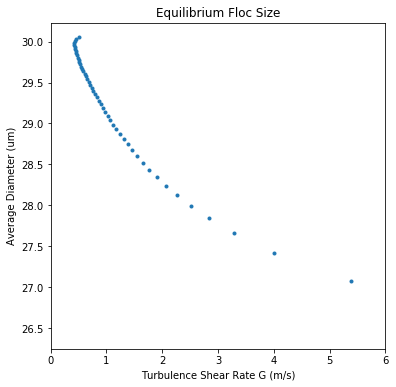

In [16]:
fig = plt.figure(figsize=(6,6))
#ax=fig.add_subplot(1,2,1)
plt.title('Equilibrium Floc Size')
plt.ylabel('Average Diameter (um)')
plt.xlabel(r'Turbulence Shear Rate G (m/s)')
plot(Gc_mn,fdiam_av_mn,'.')
plt.xlim([0, 6])
fig_name = proj_dir+case_dir+'case_'+run_name+'diam_v_G.png'
print fig_name
plt.savefig(fig_name)

savetxt(proj_dir+case_dir+run_name+'gc.txt',Gc_mn)
savetxt(proj_dir+case_dir+run_name+'diam.txt',fdiam_av_mn)
savetxt(proj_dir+case_dir+run_name+'ws.txt',ws_av_mn)
savetxt(proj_dir+case_dir+run_name+'mconc.txt',tconc_mn)